q_0,0 = 0.60653065971
q_1,1 = 0.00000000000
q_2,2 = 0.12922822263
q_3,3 = -0.25845644526
q_4,4 = 0.14494317781
q_5,5 = -0.04714486555
q_6,6 = -0.00268796548
q_7,7 = 0.02323177450
q_8,8 = -0.01559926767
q_9,9 = 0.01041941018
q_10,10 = -0.00431239267
q_11,11 = 0.00191420369
q_12,12 = -0.00061725186
q_13,13 = 0.00021276397
q_14,14 = -0.00005712389
q_15,15 = 0.00001626591
q_16,16 = -0.00000376232
q_17,17 = 0.00000091647
q_18,18 = -0.00000018666
q_19,19 = 0.00000003981

f(1.0)=0.60653   h(1.0)=0.60653
f(1.5)=-12.16543   h(1.5)=0.70855
f(2.0)=0.73576   h(2.0)=0.73576
f(2.5)=0.10260   h(2.5)=0.71626
f(3.0)=0.66939   h(3.0)=0.66939
f(3.5)=0.49737   h(3.5)=0.60821
f(4.0)=0.54134   h(4.0)=0.54134
f(4.5)=0.44676   h(4.5)=0.47430
f(5.0)=0.41042   h(5.0)=0.41042
f(5.5)=0.35771   h(5.5)=0.35160
f(6.0)=0.29872   h(6.0)=0.29872
f(6.5)=0.28459   h(6.5)=0.25203
f(7.0)=0.21138   h(7.0)=0.21138
f(7.5)=0.26749   h(7.5)=0.17638
f(8.0)=0.14653   h(8.0)=0.14653
f(8.5)=0.63559   h(8.5)=0.12125
f(9.0)=0.09998  

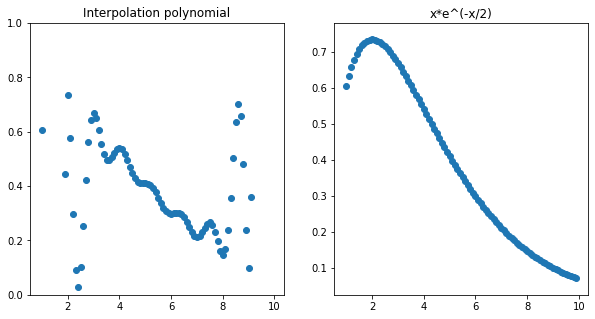

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*(math.e**(-x/2))

def f_prime(x):
    return (math.e**(-x/2))*(1-0.5*x)

class HermitePolynomial():
    def __init__(self, x_array):
        self.q = []
        self.x_array = x_array
        self.n = len(self.x_array)-1

    def hermite_coeff(self, verbose=True):
        n = self.n
        z = [0 for i in range(2*n+2)]
        q = [[0 for i in range(2*n+2)] for j in range(2*n+2)]

        for i in range(n+1):
            xi = self.x_array[i]
            f_xi = f(xi)
     
            z[2*i] = xi
            z[2*i+1] = xi
            q[2*i][0] = f_xi
            q[2*i+1][0] = f_xi
            q[2*i][1] = f_prime(xi)

            if i!=0:
                q[2*i][1] = (q[2*i][0] - q[2*i-1][0]) / (z[2*i] - z[2*i-1])

        for i in range(2,2*n+2):
            for j in range(2,i+1):
                q[i][j] = (q[i][j-1] - q[i-1][j-1]) / (z[i] - z[i-j])

        if verbose:
            for i in range(2*n+2):
                print(f"q_{i},{i} = {q[i][i]:.11f}")

        return q

    def hermite_polynomial(self, x):
        n = self.n
        h = 0
        # using memorization to store previous term result
        memo = [1 for i in range(2*n+2)]

        for i in range(1,2*n+2):
            index = i/2-1 if i%2==0 else (i+1)/2-1
            index = int(index)
            memo[i] = memo[i-1]*(x-self.x_array[index])

        for i in range(2*n+2):
            h += self.q[i][i]*memo[i]     
        return h

    def plot(self):
        x = np.arange(1.0, 10.0, .1)
        y = [self.hermite_polynomial(i) for i in x]
        y_f = [f(i) for i in x]
        
        for i in np.arange(1,10,.5):
            print(f"f({i})={self.hermite_polynomial(i):.5f}   h({i})={f(i):.5f}")

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        axes[0].scatter(x,y)
        axes[0].set_ylim(0,1)
        axes[0].set_title("Interpolation polynomial")
        axes[1].scatter(x,y_f)
        axes[1].set_title("x*e^(-x/2)")
        
        
x = [i for i in range(1,11)]
h = HermitePolynomial(x)
h.q = h.hermite_coeff()
print()
h.plot()


